In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

survival        Survival
                (0 = No; 1 = Yes)
                
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
                
name            Name

sex             Sex

age             Age

sibsp           Number of Siblings/Spouses Aboard

parch           Number of Parents/Children Aboard

ticket          Ticket Number

fare            Passenger Fare

cabin           Cabin

embarked        Port of Embarkation

In [67]:
#https://www.kaggle.com/c/titanic/data?select=train.csv
titanic = pd.read_csv('train.csv')

In [68]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
titanic = titanic.drop(["Name", "Ticket", "Cabin"], axis=1)

In [70]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]
    
titanic["who"] = titanic[["Age", "Sex"]].apply(woman_child_or_man, axis=1)

In [71]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who
0,1,0,3,male,22.0,1,0,7.2500,S,man
1,2,1,1,female,38.0,1,0,71.2833,C,woman
2,3,1,3,female,26.0,0,0,7.9250,S,woman
3,4,1,1,female,35.0,1,0,53.1000,S,woman
4,5,0,3,male,35.0,0,0,8.0500,S,man


### Статистика по пасажирах в наборі

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

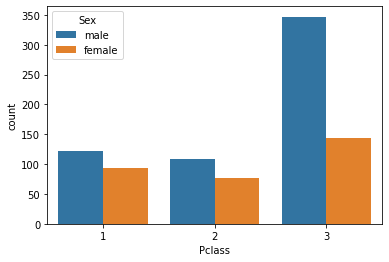

In [72]:
sns.countplot("Pclass", data=titanic, hue="Sex")

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

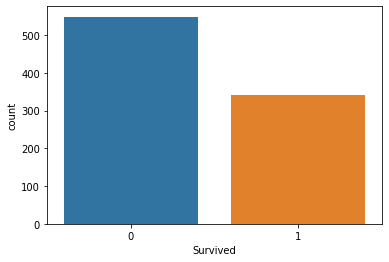

In [8]:
sns.countplot("Survived", data=titanic)

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='who', ylabel='count'>

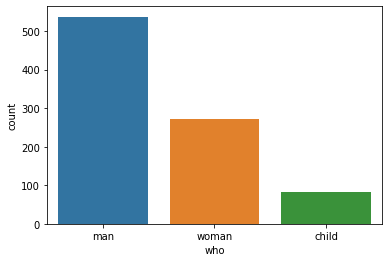

In [9]:
sns.countplot("who", data=titanic)

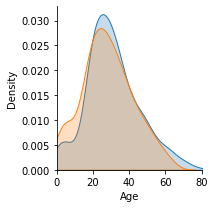

In [10]:
fg = sns.FacetGrid(titanic, hue="Sex")
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0, 80))

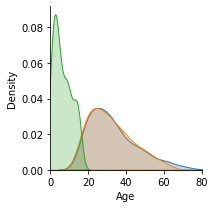

In [11]:
fg = sns.FacetGrid(titanic, hue="who")
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0, 80))

In [ ]:
# Який процент дітей вижило? 

### Статистика по класу перевезення

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

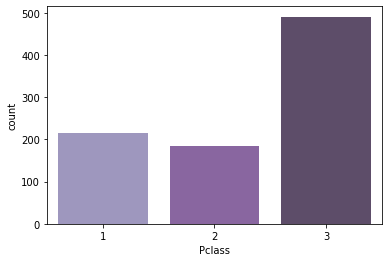

In [12]:
sns.countplot("Pclass", data=titanic, palette="BuPu_d")

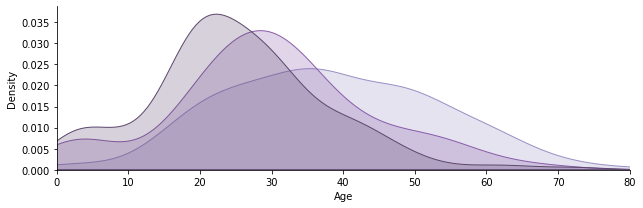

In [13]:
fg = sns.FacetGrid(titanic, hue="Pclass", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0, 80));

### Вартість квитка

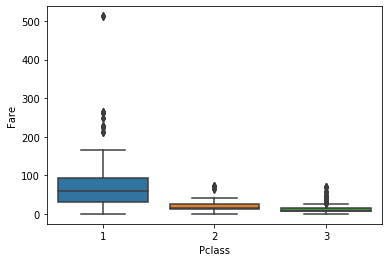

<Figure size 432x288 with 1 Axes>

In [ ]:
sns.boxplot(titanic['Pclass'], titanic['Fare'])
# дослідити, що за квитки вартість > 300

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

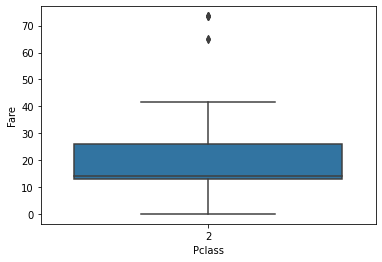

In [14]:
sns.boxplot(titanic[titanic['Pclass']==2]['Pclass'], titanic[titanic['Pclass']==2]['Fare'])

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Fare'>

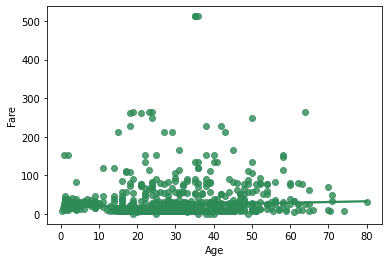

In [15]:
sns.regplot("Age", "Fare", data=titanic, robust=True, ci=None, color="seagreen")

In [ ]:
# відкинути виброси 

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

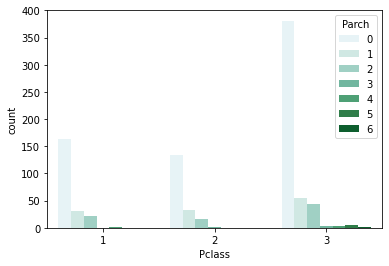

In [16]:
sns.countplot("Pclass", data=titanic, hue="Parch", palette="BuGn")

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


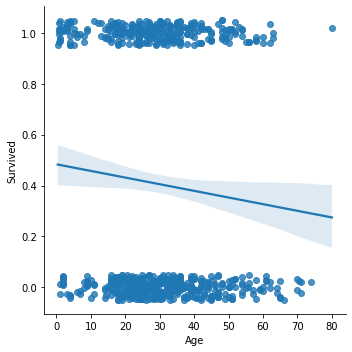

In [17]:
sns.lmplot("Age", "Survived", titanic,  y_jitter=.05)

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


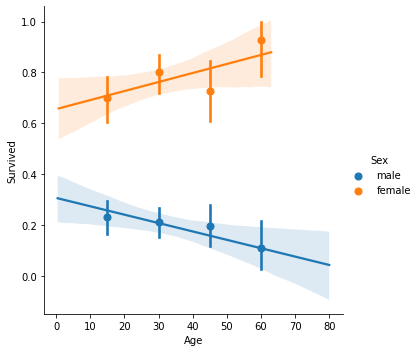

In [18]:
age_bins = [15, 30, 45, 60]
sns.lmplot("Age", "Survived", titanic, hue="Sex", x_bins=age_bins)

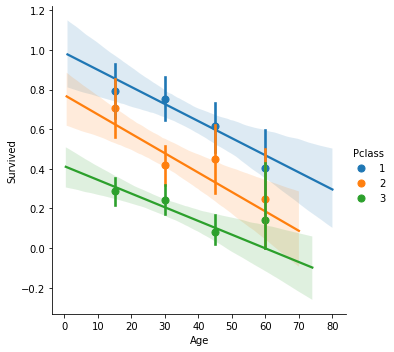

<Figure size 402.375x360 with 1 Axes>

In [ ]:
sns.lmplot("Age", "Survived", titanic, hue="Pclass", x_bins=age_bins)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who
0,1,0,3,male,22.0,1,0,7.2500,S,man
1,2,1,1,female,38.0,1,0,71.2833,C,woman
2,3,1,3,female,26.0,0,0,7.9250,S,woman
3,4,1,1,female,35.0,1,0,53.1000,S,woman
4,5,0,3,male,35.0,0,0,8.0500,S,man


In [20]:
titanic['Sex_code'] = titanic['Sex'].map( {'female': 1, 'male': 0} )
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who,Sex_code
0,1,0,3,male,22.0,1,0,7.2500,S,man,0
1,2,1,1,female,38.0,1,0,71.2833,C,woman,1
2,3,1,3,female,26.0,0,0,7.9250,S,woman,1
3,4,1,1,female,35.0,1,0,53.1000,S,woman,1
4,5,0,3,male,35.0,0,0,8.0500,S,man,0


In [21]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [22]:
titanic[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who,Sex_code,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,S,man,0,2
1,2,1,1,female,38.0,1,0,71.2833,C,woman,1,2
2,3,1,3,female,26.0,0,0,7.9250,S,woman,1,1
3,4,1,1,female,35.0,1,0,53.1000,S,woman,1,2
4,5,0,3,male,35.0,0,0,8.0500,S,man,0,1


In [75]:
pd.get_dummies(titanic['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [25]:
pclass = pd.get_dummies(titanic['Pclass'],drop_first=True)
pclass.columns = ["2nd_class","3rd_class"]
pclass

,2nd_class,3rd_class
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [26]:
sibsp = pd.get_dummies(titanic['SibSp'],drop_first=True).copy()
sibsp

,1,2,3,4,5,8
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,1,0,0,0,0,0
889,0,0,0,0,0,0


In [27]:
def new_age(age):
    if 0<=age and age<18:
        return 0
    elif 18<=age and age<25:
        return 1
    elif 25<=age and age<45:
        return 2
    elif 45<=age and age<55:
        return 3
    else:
        return 4
    
titanic['New age'] = titanic['Age'].map(new_age)

In [28]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who,Sex_code,FamilySize,New age
0,1,0,3,male,22.0,1,0,7.2500,S,man,0,2,1
1,2,1,1,female,38.0,1,0,71.2833,C,woman,1,2,2
2,3,1,3,female,26.0,0,0,7.9250,S,woman,1,1,2
3,4,1,1,female,35.0,1,0,53.1000,S,woman,1,2,2
4,5,0,3,male,35.0,0,0,8.0500,S,man,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,man,0,1,2
887,888,1,1,female,19.0,0,0,30.0000,S,woman,1,1,1
888,889,0,3,female,NaN,1,2,23.4500,S,woman,1,4,4
889,890,1,1,male,26.0,0,0,30.0000,C,man,0,1,2


In [29]:
df = titanic[['Survived', 'Sex_code', 'Fare', 'New age']]
df = pd.concat([df, pclass], axis=1)

In [30]:
df.tail()

,Survived,Sex_code,Fare,New age,2nd_class,3rd_class
886,0,0,13.00,2,1,0
887,1,1,30.00,1,0,0
888,0,1,23.45,4,0,1
889,1,0,30.00,2,0,0
890,0,0,7.75,2,0,1


In [31]:
y = df["Survived"]
X = df.drop('Survived',axis=1)

# Варіант 1

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

# accuracy - % правильно "вгаданих" значень 
print('Score на трейні', logmodel.score(X_train,y_train))

print('Score на тесті', logmodel.score(X_test,y_test))

Score на трейні 0.7859281437125748
Score на тесті 0.7802690582959642


In [77]:
from sklearn import metrics

In [78]:
y_predictions = logmodel.predict(X_test)

print(metrics.classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       128
           1       0.81      0.63      0.71        95

    accuracy                           0.78       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.78      0.78      0.77       223



In [37]:
X_minmax

array([[0. , 0.01415106, 0.25 , 0. , 1. ],
 [1. , 0.13913574, 0.5 , 0. , 0. ],
 [1. , 0.01546857, 0.5 , 0. , 1. ],
 ...,
 [1. , 0.04577135, 1. , 0. , 1. ],
 [0. , 0.0585561 , 0.5 , 0. , 0. ],
 [0. , 0.01512699, 0.5 , 0. , 1. ]])

# Варіант 2

In [82]:
X_train

,Sex_code,Fare,New age,2nd_class,3rd_class
35,0,52.0000,2,0,0
46,0,15.5000,4,0,1
453,0,89.1042,3,0,0
291,1,91.0792,1,0,0
748,0,53.1000,1,0,0
...,...,...,...,...,...
715,0,7.6500,1,0,1
767,1,7.7500,2,0,1
72,0,73.5000,1,1,0
235,1,7.5500,4,0,1


In [88]:
trans = StandardScaler()
X_minmax = trans.fit_transform(X_train)
X_minmax[3].mean()

0.03110509582251324

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# trans = StandardScaler()

# X_standart = trans.fit_transform(X)

trans = StandardScaler()
X_minmax = trans.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, random_state=1)

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

# accuracy - % правильно "вгаданих" значень 
print('Score на трейні', logmodel.score(X_train,y_train))

print('Score на тесті', logmodel.score(X_test,y_test))

Score на трейні 0.781437125748503
Score на тесті 0.7757847533632287


In [90]:
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test,y_predictions))

y_predictions = logmodel.predict(X_test)

print(metrics.classification_report(y_test,y_predictions))

confusion_matrix:
[[114  14]
 [ 35  60]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       128
           1       0.81      0.62      0.70        95

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.76       223
weighted avg       0.78      0.78      0.77       223



# Варіант 3

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# trans = StandardScaler()

# X_standart = trans.fit_transform(X)

trans = MinMaxScaler()
X_minmax = trans.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, random_state=1)

logmodel = LogisticRegression(penalty='l2', C=.1)

logmodel.fit(X_train,y_train)

# accuracy - % правильно "вгаданих" значень 
print('Score на трейні', logmodel.score(X_train,y_train))

print('Score на тесті', logmodel.score(X_test,y_test))

Score на трейні 0.7844311377245509
Score на тесті 0.7757847533632287


# Варіант 4

In [98]:
from sklearn.svm import SVC

# потребує стандартизації даних
# С - параметр штрафу (регуляризація)
# kernel - тип ядра або функція
# degree - степінь для поліноміального ядра


model = SVC(C=5,
           kernel='linear',
           )

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model.fit(X_train, y_train)

SVC(C=5, kernel='linear')

In [99]:
model.score(X_test, y_test)

0.7847533632286996

# Варіант 5

In [ ]:
from sklearn.model_selection import GridSearchCV

# Використовується для підбору найкращих параметрів моделі

scaler = StandardScaler()
X_ = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=1)


parameters = {
    'kernel':('linear', 'rbf'), 
    'C':[1, 10]
}


svc = SVC()
clf = GridSearchCV(svc, parameters)

clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.score(X_test, y_test)

0.7932203389830509

In [ ]:
clf.cv_results_

{'mean_fit_time': array([1.25904438e+01, 1.14522934e-02, 5.18010550e+01, 8.59417915e-03]),
 'std_fit_time': array([1.03508020e+01, 6.66067335e-03, 1.78256738e+01, 7.13532212e-03]),
 'mean_score_time': array([0.00059881, 0.00080357, 0.00079713, 0.00412269]),
 'std_score_time': array([0.00079836, 0.0009842 , 0.00097628, 0.00586609]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([0.79166667, 0.74166667, 0.79166667, 0.7       ]),
 'split1_test_score': array([0.76470588, 0.63865546, 0.76470588, 0.63865546]),
 'split2_test_score': array([0.75630252, 0.65546218, 0

In [ ]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

# Варіант 6

In [100]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# потрібно позбутися пропущених значень та перетворити все в числові значення

# criterion - критерій  (gini, entropy) 
# max_depth - глибина дерева
# min_samples_split - мінімальна кількість елементів, необхідних для розділення вузла


model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model.fit(X_train, y_train)

print('Score на трейні', model.score(X_train,y_train))

print('Score на тесті', model.score(X_test,y_test))

Score на трейні 0.9446107784431138
Score на тесті 0.8026905829596412


In [101]:
for i in range(1, 10):
    print(f'--------{i}--------')
    m = DecisionTreeClassifier(max_depth=i)
    m.fit(X_train, y_train)
    print('Score на трейні', m.score(X_train,y_train))
    print('Score на тесті', m.score(X_test,y_test))

--------1--------
Score на трейні 0.7874251497005988
Score на тесті 0.7847533632286996
--------2--------
Score на трейні 0.7979041916167665
Score на тесті 0.7533632286995515
--------3--------
Score на трейні 0.8293413173652695
Score на тесті 0.8026905829596412
--------4--------
Score на трейні 0.8383233532934131
Score на тесті 0.7713004484304933
--------5--------
Score на трейні 0.8607784431137725
Score на тесті 0.7713004484304933
--------6--------
Score на трейні 0.8712574850299402
Score на тесті 0.7802690582959642
--------7--------
Score на трейні 0.8892215568862275
Score на тесті 0.7713004484304933
--------8--------
Score на трейні 0.8997005988023952
Score на тесті 0.8071748878923767
--------9--------
Score на трейні 0.9086826347305389
Score на тесті 0.8071748878923767


In [107]:
m = DecisionTreeClassifier(max_depth=3)
m.fit(X_train, y_train)
print('Score на трейні', m.score(X_train,y_train))
print('Score на тесті', m.score(X_test,y_test))

Score на трейні 0.8293413173652695
Score на тесті 0.8026905829596412


In [104]:
X

,Sex_code,Fare,New age,2nd_class,3rd_class
0,0,7.2500,1,0,1
1,1,71.2833,2,0,0
2,1,7.9250,2,0,1
3,1,53.1000,2,0,0
4,0,8.0500,2,0,1
...,...,...,...,...,...
886,0,13.0000,2,1,0
887,1,30.0000,1,0,0
888,1,23.4500,4,0,1
889,0,30.0000,2,0,0


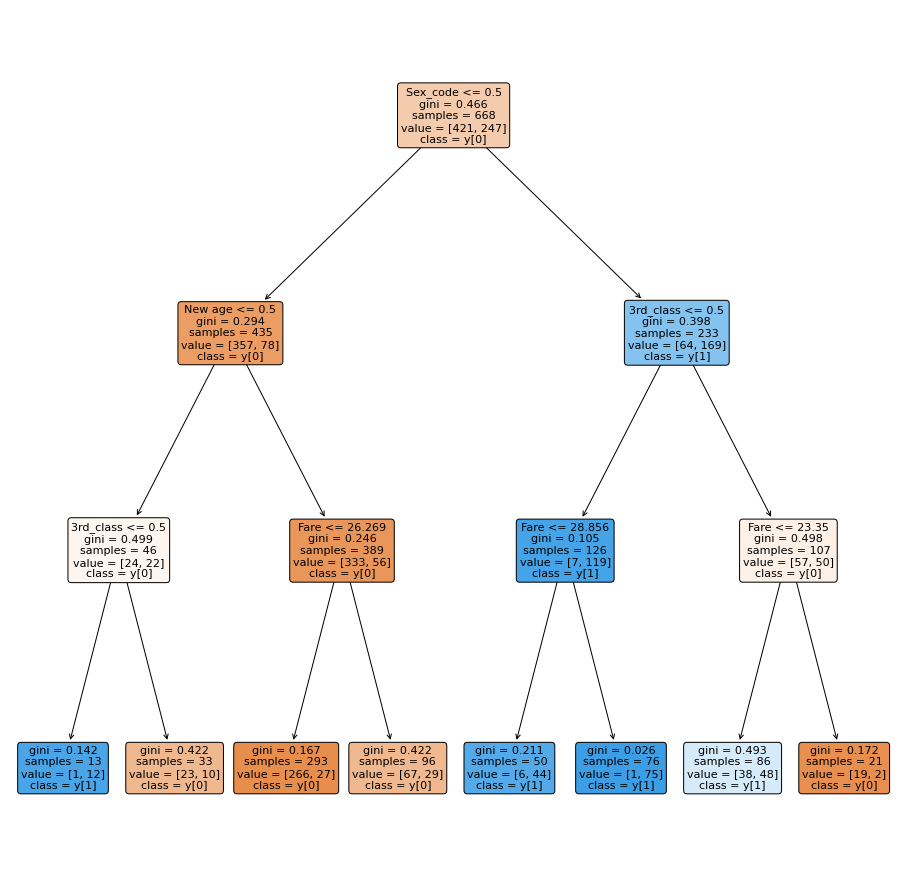

In [115]:
plt.figure(figsize=(16,16))

plot_tree(m, feature_names=X.columns, filled=True,  rounded=True,  class_names=True)


plt.show()

# Варіант 7

In [117]:
from sklearn.ensemble import RandomForestClassifier

# реалізація bagging

# criterion - критерій  (gini, entropy) 
# max_depth - глубина дерева
# min_samples_split - мінімальна кількість елементів, необхідних для розділення вузла
# n_еstimatоrs - кількість дерев


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = RandomForestClassifier()
model.fit(X_train, y_train)

print('Score на трейні', model.score(X_train,y_train))
print('Score на тесті', model.score(X_test,y_test))

Score на трейні 0.9446107784431138
Score на тесті 0.8161434977578476


In [118]:
for i in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators=i, random_state=1)
    model.fit(X_train, y_train)
    print(i, model.score(X_test, y_test))
    

1 0.7488789237668162
11 0.8161434977578476
21 0.8161434977578476
31 0.8071748878923767
41 0.8071748878923767
51 0.8161434977578476
61 0.8161434977578476
71 0.8161434977578476
81 0.8071748878923767
91 0.8161434977578476


In [ ]:
model.score(X_test, y_test)

0.8026905829596412

# Варіант 8

XGBoost - це популярна бібліотека, відмінна від Scikitlearn.
Вона створює слабке дерево (weak tree), а потім "бустує" настпуні дерева, щоб зменшити помилки.


Обробка даних:  категоріальні дані потрібно кодувати.


Для зупинки навчання може бути встановлений параметр early_stoppping_rounds=N, якщо після N раундів покращення не відбувається. Регуляція Ll і L2 контролюється reg_alpha і reg_lambda відповідно. 

In [119]:
import xgboost as xgb
xgb_class = xgb.XGBClassifier()

In [120]:
xgb_class.fit(X_train, y_train)

[18:12:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
xgb_class.score(X_train, y_train)

0.9296407185628742

In [121]:
xgb_class.score(X_test, y_test)

0.7982062780269058

In [63]:
xgb_class.feature_importances_

array([0.625137 , 0.03076593, 0.0439873 , 0.03091952, 0.26919028],
 dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

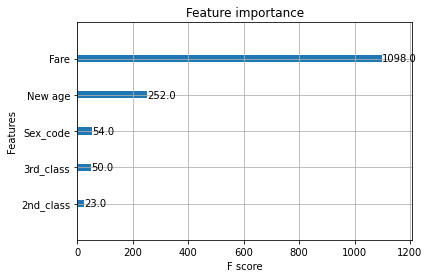

In [122]:
# скільки разів фіча зустрічається в деревах
xgb.plot_importance(xgb_class)

In [123]:
booster = xgb_class.get_booster()
print(booster.get_dump()[0])

0:[Sex_code<1] yes=1,no=2,missing=1
	1:[New age<1] yes=3,no=4,missing=3
		3:[3rd_class<1] yes=7,no=8,missing=7
			7:leaf=0.388235331
			8:[Fare<20.8250008] yes=13,no=14,missing=13
				13:[Fare<10.3166504] yes=19,no=20,missing=19
					19:leaf=-0.280000001
					20:[Fare<16.9500008] yes=29,no=30,missing=29
						29:leaf=0.333333373
						30:leaf=-0
				14:leaf=-0.388235331
		4:[Fare<26.2687492] yes=9,no=10,missing=9
			9:leaf=-0.482828289
			10:[Fare<26.7749996] yes=15,no=16,missing=15
				15:[New age<4] yes=21,no=22,missing=21
					21:leaf=0.300000012
					22:leaf=-0.333333373
				16:[2nd_class<1] yes=23,no=24,missing=23
					23:[New age<3] yes=31,no=32,missing=31
						31:leaf=-0.138461545
						32:leaf=-0.285714298
					24:leaf=-0.428571463
	2:[3rd_class<1] yes=5,no=6,missing=5
		5:leaf=0.51692313
		6:[Fare<23.3500004] yes=11,no=12,missing=11
			11:[New age<4] yes=17,no=18,missing=17
				17:[New age<2] yes=25,no=26,missing=25
					25:[New age<1] yes=33,no=34,missing=33
						33:leaf=0.

ImportError: ImportError: You must install graphviz to plot tree

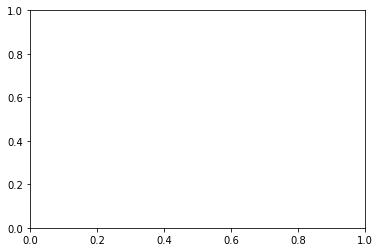

In [124]:
# import os
# os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

xgb.plot_tree(xgb_class)